**Import the nesessary libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import os
from tqdm import tqdm
import math

**Mounth Path**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data_path='/content/drive/MyDrive/CVPR/Animals'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Let's check the categories of the dataset using listdir which enables of access the folders.**

In [4]:
categories=os.listdir(data_path)
print(categories)

['Leopard', 'Cheetah', 'Tiger', 'Jaguar', 'Lion']



1. for preprocessing, we will store the images in a list train_data, each element of the list contains two items, the image as img_arr and the label of the image as class_index which is the folder name containing the images.
2. We will also convert the image gray scale color for easy calculation and resize the image as (256,256)
3. let's also print the total number of images.

100%|██████████| 32/32 [00:10<00:00,  3.15it/s]


170


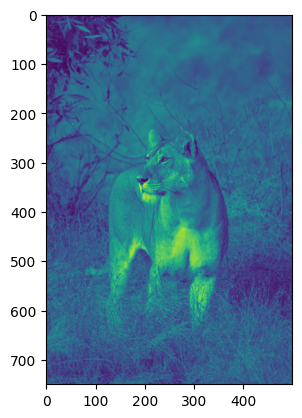

In [5]:
train_data = []
for c in categories:
    path = os.path.join(data_path,c)
    class_index = categories.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        img_arr=cv2.cvtColor(img_arr,cv2.COLOR_BGR2GRAY)
        plt.imshow(img_arr)
        img_arr = cv2.resize(img_arr,(256,256))
        train_data.append([img_arr, class_index])
print(len(train_data))


Now let's suffle the data. The purpose is that by shuffling we will ensure the images are randomize for training and the model learns from all the labels each time. Let's also print some images with their label.

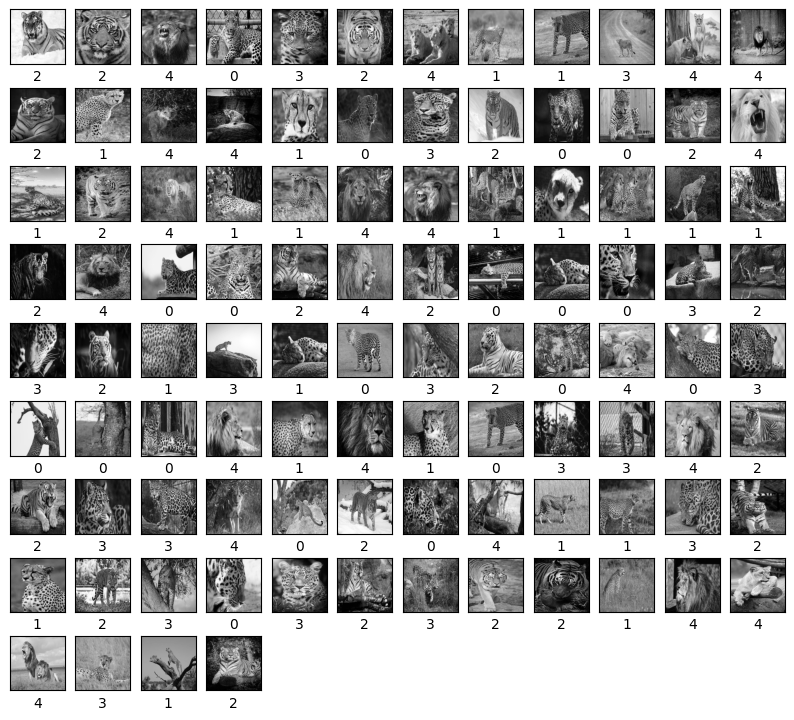

In [6]:
random.shuffle(train_data)
plt.figure(figsize=(10,10))
i=0
for r in range(10):
  for c in range(10):
    plt.subplot(10,12,i+1)
    plt.imshow(train_data[i][0],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_data[i][1])
    i+=1
plt.show()


There are 170 images in total. Let's take 34 images in each fold and in total, there are 5 folds.

In [7]:
f0=train_data[0:34]
f1=train_data[34:68]
f2=train_data[68:102]
f3=train_data[102:136]
f4=train_data[136:170]

let's take the value of k from 1 to 30 in a list.

In [8]:
accuracy_l2=[]
K = list(range(1, 31))

1. We will use a loop, where in each iteration, one fold is used as the validation set, and the remaining folds are combined as the training set.
2. Midpoint accuracy for each fold will be stored in an array, and individual fold accuracies for different values of
K will be stored in another array.
3. In each iteration, the following steps are performed:
a. Compute the L2 distance between each validation sample and all training samples.
b. Sort the distances and select the  K-nearest neighbors to predict the label.
c. Calculate accuracy for the current
K and store it.
d. Compute the midpoint accuracy and update the arrays.

In [10]:
folds = [f0, f1, f2, f3, f4]

mid_point_accuracy_l2 = []
fold_accuracies_l2 = [[] for _ in range(len(folds))]

for i in range(len(folds)):
    validation = folds[i]
    train = [f for j, f in enumerate(folds) if j != i]
    train = sum(train, [])
    total_accuracy_l2 = []
    mid_point_accuracy_per_fold_l2 = []

    for k in K:
        accuracy_l2 = 0

        for v in tqdm(validation):
            scores_l2 = []

            for t in train:
                l2_dist = np.sqrt(np.sum((t[0] - v[0])**2))
                scores_l2.append([l2_dist, t[1]])

            sorted_scores_l2 = sorted(scores_l2, key=lambda a: a[0])
            top_k2 = [sorted_scores_l2[i][1] for i in range(k)]
            pred_label_l2 = max(set(top_k2), key=top_k2.count)

            if pred_label_l2 == v[1]:
                accuracy_l2 += 1

        accuracy_l2 = accuracy_l2 / len(validation) * 100
        print(f"Fold {i+1}, k = {k}")
        print(f"L2 Accuracy: {accuracy_l2:.2f}%")

        total_accuracy_l2.append(accuracy_l2)
        midPoint_l2 = (min(total_accuracy_l2) + max(total_accuracy_l2)) / 2
        mid_point_accuracy_per_fold_l2.append(midPoint_l2)
        fold_accuracies_l2[i].append(accuracy_l2)

    mid_point_accuracy_l2.append(mid_point_accuracy_per_fold_l2)

dlt_arrays_l2 = [np.array(x) for x in mid_point_accuracy_l2]
new_mid_point_accuracy_l2 = [np.mean(k) for k in zip(*dlt_arrays_l2)]

100%|██████████| 34/34 [00:00<00:00, 105.70it/s]


Fold 1, k = 1
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 114.81it/s]


Fold 1, k = 2
L2 Accuracy: 11.76%


100%|██████████| 34/34 [00:00<00:00, 115.72it/s]


Fold 1, k = 3
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 109.47it/s]


Fold 1, k = 4
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 91.70it/s]


Fold 1, k = 5
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 97.95it/s] 


Fold 1, k = 6
L2 Accuracy: 35.29%


100%|██████████| 34/34 [00:00<00:00, 110.79it/s]


Fold 1, k = 7
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 69.91it/s]


Fold 1, k = 8
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 59.17it/s]


Fold 1, k = 9
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 70.50it/s]


Fold 1, k = 10
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 79.00it/s]


Fold 1, k = 11
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 75.74it/s]


Fold 1, k = 12
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 80.81it/s]


Fold 1, k = 13
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 70.03it/s]


Fold 1, k = 14
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 74.55it/s]


Fold 1, k = 15
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 67.43it/s]


Fold 1, k = 16
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 107.94it/s]


Fold 1, k = 17
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 113.32it/s]


Fold 1, k = 18
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 98.22it/s] 


Fold 1, k = 19
L2 Accuracy: 35.29%


100%|██████████| 34/34 [00:00<00:00, 107.30it/s]


Fold 1, k = 20
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 114.85it/s]


Fold 1, k = 21
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 102.44it/s]


Fold 1, k = 22
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 112.33it/s]


Fold 1, k = 23
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 115.02it/s]


Fold 1, k = 24
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 104.39it/s]


Fold 1, k = 25
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 112.36it/s]


Fold 1, k = 26
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 114.67it/s]


Fold 1, k = 27
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 52.80it/s]


Fold 1, k = 28
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 114.09it/s]


Fold 1, k = 29
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 110.76it/s]


Fold 1, k = 30
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 109.59it/s]


Fold 2, k = 1
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 112.86it/s]


Fold 2, k = 2
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 104.98it/s]


Fold 2, k = 3
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 80.98it/s]


Fold 2, k = 4
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 108.18it/s]


Fold 2, k = 5
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 111.22it/s]


Fold 2, k = 6
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 110.42it/s]


Fold 2, k = 7
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 86.45it/s] 


Fold 2, k = 8
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 87.56it/s]


Fold 2, k = 9
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 110.98it/s]


Fold 2, k = 10
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 118.43it/s]


Fold 2, k = 11
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 106.95it/s]


Fold 2, k = 12
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 110.53it/s]


Fold 2, k = 13
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 117.56it/s]


Fold 2, k = 14
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 109.01it/s]


Fold 2, k = 15
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 92.62it/s] 


Fold 2, k = 16
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 77.30it/s]


Fold 2, k = 17
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 74.89it/s]


Fold 2, k = 18
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 80.83it/s]


Fold 2, k = 19
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 76.74it/s]


Fold 2, k = 20
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 74.86it/s]


Fold 2, k = 21
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 71.62it/s]


Fold 2, k = 22
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 71.18it/s]


Fold 2, k = 23
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 69.37it/s]


Fold 2, k = 24
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 84.34it/s]


Fold 2, k = 25
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 114.38it/s]


Fold 2, k = 26
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 102.74it/s]


Fold 2, k = 27
L2 Accuracy: 14.71%


100%|██████████| 34/34 [00:00<00:00, 70.43it/s]


Fold 2, k = 28
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 105.93it/s]


Fold 2, k = 29
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 114.44it/s]


Fold 2, k = 30
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 109.50it/s]


Fold 3, k = 1
L2 Accuracy: 35.29%


100%|██████████| 34/34 [00:00<00:00, 106.69it/s]


Fold 3, k = 2
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 111.09it/s]


Fold 3, k = 3
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 106.02it/s]


Fold 3, k = 4
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 112.65it/s]


Fold 3, k = 5
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 88.79it/s]


Fold 3, k = 6
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 111.71it/s]


Fold 3, k = 7
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 109.44it/s]


Fold 3, k = 8
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 76.88it/s]


Fold 3, k = 9
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 105.19it/s]


Fold 3, k = 10
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 63.92it/s]


Fold 3, k = 11
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 99.54it/s] 


Fold 3, k = 12
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 46.84it/s]


Fold 3, k = 13
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 116.72it/s]


Fold 3, k = 14
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 100.41it/s]


Fold 3, k = 15
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 113.76it/s]


Fold 3, k = 16
L2 Accuracy: 14.71%


100%|██████████| 34/34 [00:00<00:00, 103.07it/s]


Fold 3, k = 17
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 103.76it/s]


Fold 3, k = 18
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 105.50it/s]


Fold 3, k = 19
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 113.86it/s]


Fold 3, k = 20
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 102.44it/s]


Fold 3, k = 21
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 111.51it/s]


Fold 3, k = 22
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 79.09it/s]


Fold 3, k = 23
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 73.11it/s]


Fold 3, k = 24
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 76.10it/s]


Fold 3, k = 25
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 69.18it/s]


Fold 3, k = 26
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 54.02it/s]


Fold 3, k = 27
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 61.01it/s]


Fold 3, k = 28
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 73.12it/s]


Fold 3, k = 29
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 60.57it/s]


Fold 3, k = 30
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 76.26it/s]


Fold 4, k = 1
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 101.92it/s]


Fold 4, k = 2
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 115.05it/s]


Fold 4, k = 3
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 116.69it/s]


Fold 4, k = 4
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 94.38it/s]


Fold 4, k = 5
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 114.55it/s]


Fold 4, k = 6
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 115.42it/s]


Fold 4, k = 7
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 100.37it/s]


Fold 4, k = 8
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 109.06it/s]


Fold 4, k = 9
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 111.88it/s]


Fold 4, k = 10
L2 Accuracy: 14.71%


100%|██████████| 34/34 [00:00<00:00, 104.79it/s]


Fold 4, k = 11
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 111.24it/s]


Fold 4, k = 12
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 115.02it/s]


Fold 4, k = 13
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 104.29it/s]


Fold 4, k = 14
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 101.17it/s]


Fold 4, k = 15
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 111.43it/s]


Fold 4, k = 16
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 106.44it/s]


Fold 4, k = 17
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 110.33it/s]


Fold 4, k = 18
L2 Accuracy: 14.71%


100%|██████████| 34/34 [00:00<00:00, 115.73it/s]


Fold 4, k = 19
L2 Accuracy: 14.71%


100%|██████████| 34/34 [00:00<00:00, 104.71it/s]


Fold 4, k = 20
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 101.51it/s]


Fold 4, k = 21
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 110.44it/s]


Fold 4, k = 22
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 105.03it/s]


Fold 4, k = 23
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 108.71it/s]


Fold 4, k = 24
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 113.61it/s]


Fold 4, k = 25
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 103.04it/s]


Fold 4, k = 26
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 111.78it/s]


Fold 4, k = 27
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 109.77it/s]


Fold 4, k = 28
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 105.59it/s]


Fold 4, k = 29
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 109.76it/s]


Fold 4, k = 30
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 105.52it/s]


Fold 5, k = 1
L2 Accuracy: 38.24%


100%|██████████| 34/34 [00:00<00:00, 81.49it/s]


Fold 5, k = 2
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 74.01it/s]


Fold 5, k = 3
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 77.65it/s]


Fold 5, k = 4
L2 Accuracy: 32.35%


100%|██████████| 34/34 [00:00<00:00, 76.29it/s]


Fold 5, k = 5
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 78.87it/s]


Fold 5, k = 6
L2 Accuracy: 26.47%


100%|██████████| 34/34 [00:00<00:00, 74.53it/s]


Fold 5, k = 7
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 68.00it/s]


Fold 5, k = 8
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 69.71it/s]


Fold 5, k = 9
L2 Accuracy: 14.71%


100%|██████████| 34/34 [00:00<00:00, 71.92it/s]


Fold 5, k = 10
L2 Accuracy: 14.71%


100%|██████████| 34/34 [00:00<00:00, 95.79it/s] 


Fold 5, k = 11
L2 Accuracy: 11.76%


100%|██████████| 34/34 [00:00<00:00, 116.53it/s]


Fold 5, k = 12
L2 Accuracy: 11.76%


100%|██████████| 34/34 [00:00<00:00, 102.89it/s]


Fold 5, k = 13
L2 Accuracy: 14.71%


100%|██████████| 34/34 [00:00<00:00, 104.78it/s]


Fold 5, k = 14
L2 Accuracy: 14.71%


100%|██████████| 34/34 [00:00<00:00, 106.29it/s]


Fold 5, k = 15
L2 Accuracy: 14.71%


100%|██████████| 34/34 [00:00<00:00, 112.14it/s]


Fold 5, k = 16
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 104.79it/s]


Fold 5, k = 17
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 113.30it/s]


Fold 5, k = 18
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 109.29it/s]


Fold 5, k = 19
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 105.55it/s]


Fold 5, k = 20
L2 Accuracy: 29.41%


100%|██████████| 34/34 [00:00<00:00, 110.80it/s]


Fold 5, k = 21
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 111.83it/s]


Fold 5, k = 22
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 101.36it/s]


Fold 5, k = 23
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 110.24it/s]


Fold 5, k = 24
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 116.04it/s]


Fold 5, k = 25
L2 Accuracy: 17.65%


100%|██████████| 34/34 [00:00<00:00, 100.42it/s]


Fold 5, k = 26
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 101.68it/s]


Fold 5, k = 27
L2 Accuracy: 23.53%


100%|██████████| 34/34 [00:00<00:00, 104.63it/s]


Fold 5, k = 28
L2 Accuracy: 14.71%


100%|██████████| 34/34 [00:00<00:00, 97.01it/s]


Fold 5, k = 29
L2 Accuracy: 20.59%


100%|██████████| 34/34 [00:00<00:00, 107.56it/s]

Fold 5, k = 30
L2 Accuracy: 11.76%


Finally, we will plot the accuracy for each fold and the average midpoint accuracy.

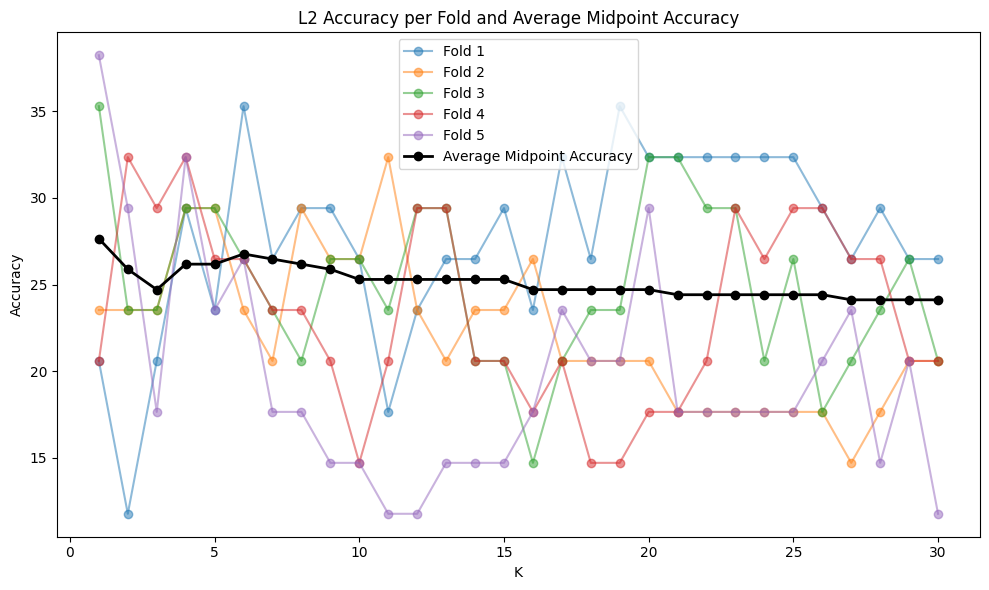

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, fold_accuracy in enumerate(fold_accuracies_l2):
    ax.plot(K, fold_accuracy, 'o-', label=f'Fold {i+1}', alpha=0.5)

ax.plot(K, new_mid_point_accuracy_l2, 'o-', color='black', label='Average Midpoint Accuracy', linewidth=2)
ax.set_xlabel('K')
ax.set_ylabel('Accuracy')
ax.legend(loc='best')
ax.set_title('L2 Accuracy per Fold and Average Midpoint Accuracy')
plt.tight_layout()
plt.show()